In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('scaled_X_features.csv')

# Separate the features (X) and target variable (y)
X = df.drop('learning_style', axis=1)
y = df['learning_style']


# Create an instance of the SMOTE class
smote = SMOTE()

# Apply SMOTE on the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Print the balanced class distribution
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())


Original class distribution: 0    523
3    427
2     43
1      7
Name: learning_style, dtype: int64
Resampled class distribution: 0    523
3    523
2    523
1    523
Name: learning_style, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
classifiertun = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(classifiertun, param_grid, cv=5)
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Make predictions on the test set
y_predtun = best_model.predict(X_test)  # Replace X_test with your actual test data

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_predtun)  # Replace y_test with your actual test labels

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.9331742243436754


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(max_depth= 10, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 300)
classifier2.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[ 96   0   1  10]
 [  0  95   0   0]
 [  1   0 111   0]
 [ 10   0   7  88]]


0.9307875894988067

In [ ]:
from sklearn.model_selection import cross_val_score





# Perform cross-validation
cv_scores = cross_val_score(classifier2, X_train, y_train, cv=5)

# Print the accuracy scores for each fold
print("Cross-validation scores:", cv_scores)

# Compute the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

print("Accuracy: {:.2f} %".format(cv_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(cv_scores.std()*100))


Cross-validation scores: [0.92537313 0.91641791 0.92537313 0.93413174 0.9251497 ]
Mean accuracy: 0.9252891232460453
Accuracy: 92.53 %
Standard Deviation: 0.56 %


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

Accuracy of RF 0.9379474940334129
F1 score of RF 0.9385708316923008




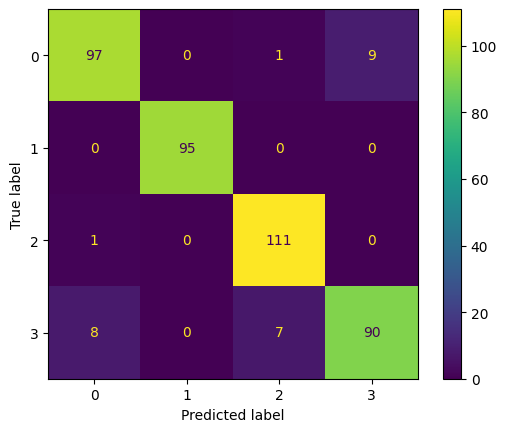

In [ ]:

model = RandomForestClassifier(max_depth= 10, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 300)
model.fit(X_train, y_train)
pred_RF=model.predict(X_test)
score_RF=accuracy_score(y_test,pred_RF)
f1_RF = f1_score(pred_RF, y_test, average="weighted")

print('Accuracy of RF',score_RF)
print('F1 score of RF',f1_RF)
print("\n")

cm = confusion_matrix(y_test, pred_RF, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have predicted labels stored in `y_pred` and true labels stored in `y_true`
print(classification_report(y_test, y_pred2, zero_division=0))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       107
           1       1.00      1.00      1.00        95
           2       0.93      0.99      0.96       112
           3       0.90      0.84      0.87       105

    accuracy                           0.93       419
   macro avg       0.93      0.93      0.93       419
weighted avg       0.93      0.93      0.93       419



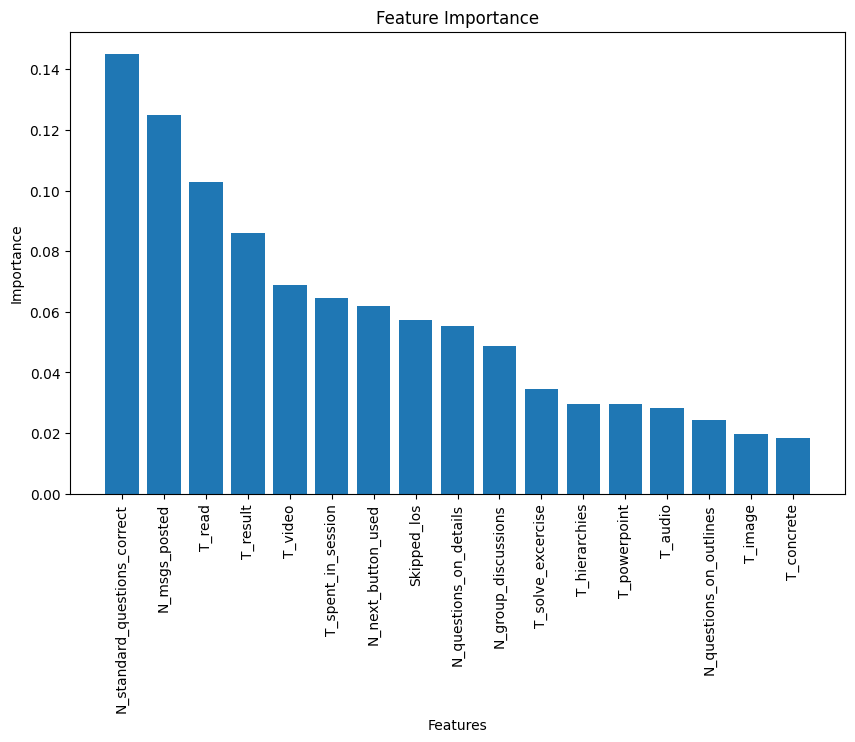

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
rf_clf = RandomForestClassifier(max_depth= 10, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 300)
rf_clf.fit(X_train, y_train)

# Get the feature importances
importance = rf_clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importance)[::-1]

# Arrange the feature names in the same order
feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
